In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [18]:
data = pd.read_excel('/content/expanded_dataset_with_names.xlsx')
df = pd.DataFrame(data)
items = df.iloc[:, 1:]
items

,jane eyre,1984,wuthering,picture of dorian,catcher in rye,sense and sensibility,great expectations,tale of cities,brave new world,macbeth,The Great Gatsby,picture of dorian
0,NaN,5.0,1,4.0,4.0,0.0,4.0,4.0,0.0,5.0,3.93,NaN
1,0.0,5.0,0,5.0,2.0,4.0,0.0,3.0,5.0,NaN,NaN,NaN
2,NaN,5.0,3,NaN,4.0,4.0,5.0,NaN,3.0,2.0,3.00,NaN
3,5.0,1.0,1,4.0,1.0,3.0,3.0,3.0,3.0,2.0,0.00,NaN
4,5.0,NaN,4,0.0,4.0,4.0,0.0,3.0,4.0,5.0,2.00,NaN
5,1.0,1.0,3,5.0,4.0,4.0,5.0,4.0,3.0,5.0,NaN,NaN
6,3.0,NaN,3,NaN,NaN,5.0,NaN,3.0,4.0,NaN,5.00,NaN
7,3.0,4.0,1,5.0,1.0,2.0,4.0,5.0,2.0,4.0,5.00,NaN
8,5.0,1.0,4,5.0,5.0,5.0,2.0,NaN,3.0,5.0,5.00,NaN
9,3.0,4.0,3,5.0,4.0,NaN,3.0,3.0,4.0,5.0,NaN,NaN


In [4]:
tnu = len(df['users'])
tni = len(items.columns)

In [5]:
tnu

43

In [6]:
tni

12

In [7]:
non_null_counts = df.count()

print("Non-null values in each column:")
print(non_null_counts)

Non-null values in each column:
users                    43
jane eyre                35
1984                     34
wuthering                43
picture of dorian        11
catcher in rye           36
sense and sensibility    37
great expectations       37
tale of cities           38
brave new world          42
macbeth                  33
The Great Gatsby         35
picture of dorian        27
dtype: int64


In [8]:
U1 = df[df.isnull().sum(axis=1) == 2]
U1 = U1.iloc[1,:]
U2 = df[df.isnull().sum(axis=1) == 3]
U3 = df[df.isnull().sum(axis=1) ==5 ]

U3

,users,jane eyre,1984,wuthering,picture of dorian,catcher in rye,sense and sensibility,great expectations,tale of cities,brave new world,macbeth,The Great Gatsby,picture of dorian
41,Christine Lawson,1.0,4.0,0,NaN,0.0,NaN,3.0,1.0,NaN,NaN,NaN,0.0


In [12]:
missing_ratings_per_item = items.isna().sum(axis=0)
target_percentages = [0.04, 0.2]
total_users = items.shape[0]
target_missing_counts = [int(total_users * target) for target in target_percentages]
closest_items = []
for target_count in target_missing_counts:
    closest_item = missing_ratings_per_item.abs() - target_count
    closest_item = closest_item.idxmin()
    closest_items.append(closest_item)

I1_index, I2_index = closest_items
print(f"Selected target items: I1 = {I1_index}, I2 = {I2_index}")


Selected target items: I1 = wuthering, I2 = wuthering


In [13]:
U2.dropna(axis=1, inplace=True)
U2_columns = U2.columns
co_rated_users = df[U2_columns].notna().any(axis=1)
co_rated_user_indices = co_rated_users[co_rated_users].index
No_common_users = len(co_rated_user_indices)
No_coRated_items = df.loc[co_rated_user_indices, U2_columns].notna().sum().sum()
print(f"Number of users with co-rated items: {No_common_users}")
print(f"Number of co-rated items: {No_coRated_items}")

Number of users with co-rated items: 43
Number of co-rated items: 128


<ipython-input-13-3f057065964e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U2.dropna(axis=1, inplace=True)


In [14]:
U3.dropna(axis=1, inplace=True)
U3_columns = U3.columns

co_rated_users = df[U3_columns].notna().any(axis=1)
co_rated_user_indices = co_rated_users[co_rated_users].index
No_common_users = len(co_rated_user_indices)
No_coRated_items = df.loc[co_rated_user_indices, U3_columns].notna().sum().sum()

print(f"Number of users with co-rated items: {No_common_users}")
print(f"Number of co-rated items: {No_coRated_items}")
result = [(No_common_users, No_coRated_items)]
result = sorted(result, key=lambda x: x[0], reverse=True)

print("2D Array (No_common_users, No_coRated_items):")
print(result)

Number of users with co-rated items: 43
Number of co-rated items: 293
2D Array (No_common_users, No_coRated_items):
[(43, 293)]


<ipython-input-14-d58b342ae2b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U3.dropna(axis=1, inplace=True)


In [23]:
import pandas as pd
import numpy as np
active_user_idx = 2
U2 = df.loc[[active_user_idx]].copy()
U2.dropna(axis=1, inplace=True)
U2_columns = U2.columns
co_rated_users = df[U2_columns].notna().any(axis=1)
co_rated_user_indices = co_rated_users[co_rated_users].index
co_rated_user_indices = co_rated_user_indices.difference([active_user_idx])
no_common_users_list = []
no_coRated_items_list = []
for user_idx in co_rated_user_indices:

    co_rated_items = df.loc[[active_user_idx, user_idx], U2_columns].notna().all(axis=0)
    no_coRated_items = co_rated_items.sum()

    if no_coRated_items > 0:
        no_common_users_list.append(1)
        no_coRated_items_list.append(no_coRated_items)


no_common_users = sum(no_common_users_list)
result_array = np.column_stack((no_common_users_list, no_coRated_items_list))

sorted_result_array = result_array[np.argsort(-result_array[:, 0])]

print(f"Number of users with co-rated items: {no_common_users}")
print(f"Resulting 2D array (sorted):\n{sorted_result_array}")


Number of users with co-rated items: 42
Resulting 2D array (sorted):
[[1 9]
 [1 9]
 [1 6]
 [1 8]
 [1 9]
 [1 7]
 [1 8]
 [1 9]
 [1 7]
 [1 9]
 [1 7]
 [1 9]
 [1 7]
 [1 8]
 [1 8]
 [1 7]
 [1 8]
 [1 9]
 [1 8]
 [1 9]
 [1 8]
 [1 9]
 [1 7]
 [1 9]
 [1 8]
 [1 8]
 [1 5]
 [1 9]
 [1 9]
 [1 7]
 [1 5]
 [1 7]
 [1 9]
 [1 9]
 [1 9]
 [1 7]
 [1 7]
 [1 9]
 [1 8]
 [1 6]
 [1 7]
 [1 8]]


In [19]:
import pandas as pd
import numpy as np
active_user_idx = 0
U2 = df.loc[[active_user_idx]].copy()
U2.dropna(axis=1, inplace=True)
U2_columns = U2.columns
co_rated_users = df[U2_columns].notna().any(axis=1)
co_rated_user_indices = co_rated_users[co_rated_users].index
co_rated_user_indices = co_rated_user_indices.difference([active_user_idx])
no_common_users_list = []
no_coRated_items_list = []
for user_idx in co_rated_user_indices:

    co_rated_items = df.loc[[active_user_idx, user_idx], U2_columns].notna().all(axis=0)
    no_coRated_items = co_rated_items.sum()

    if no_coRated_items > 0:
        no_common_users_list.append(1)
        no_coRated_items_list.append(no_coRated_items)


no_common_users = sum(no_common_users_list)
result_array = np.column_stack((no_common_users_list, no_coRated_items_list))

sorted_result_array = result_array[np.argsort(-result_array[:, 0])]

print(f"Number of users with co-rated items: {no_common_users}")
print(f"Resulting 2D array (sorted):\n{sorted_result_array}")


Number of users with co-rated items: 42
Resulting 2D array (sorted):
[[ 1  9]
 [ 1 10]
 [ 1  7]
 [ 1  9]
 [ 1 10]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1  8]
 [ 1  9]
 [ 1  8]
 [ 1 10]
 [ 1  8]
 [ 1  9]
 [ 1  9]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1  9]
 [ 1 10]
 [ 1  9]
 [ 1  9]
 [ 1  9]
 [ 1 11]
 [ 1 10]
 [ 1 10]
 [ 1  6]
 [ 1 11]
 [ 1 10]
 [ 1  9]
 [ 1  6]
 [ 1  9]
 [ 1 11]
 [ 1 10]
 [ 1 10]
 [ 1  8]
 [ 1  8]
 [ 1 10]
 [ 1  8]
 [ 1  7]
 [ 1  9]
 [ 1  9]]


In [22]:
import pandas as pd
import numpy as np
active_user_idx = 5
U3 = df.loc[[active_user_idx]].copy()
U3.dropna(axis=1, inplace=True)

U3_columns = U3.columns


co_rated_users = df[U3_columns].notna().any(axis=1)
co_rated_user_indices = co_rated_users[co_rated_users].index
co_rated_user_indices = co_rated_user_indices.difference([active_user_idx])


no_common_users_list = []
no_coRated_items_list = []

for user_idx in co_rated_user_indices:

    co_rated_items = df.loc[[active_user_idx, user_idx], U2_columns].notna().all(axis=0)
    no_coRated_items = co_rated_items.sum()

    if no_coRated_items > 0:
        no_common_users_list.append(1)
        no_coRated_items_list.append(no_coRated_items)


no_common_users = sum(no_common_users_list)
result_array = np.column_stack((no_common_users_list, no_coRated_items_list))

sorted_result_array = result_array[np.argsort(-result_array[:, 0])]

print(f"Number of users with co-rated items: {no_common_users}")
print(f"Resulting 2D array (sorted):\n{sorted_result_array}")


Number of users with co-rated items: 42
Resulting 2D array (sorted):
[[ 1 10]
 [ 1  9]
 [ 1  7]
 [ 1  9]
 [ 1  9]
 [ 1  7]
 [ 1  9]
 [ 1  9]
 [ 1  7]
 [ 1  8]
 [ 1  7]
 [ 1  9]
 [ 1  7]
 [ 1  8]
 [ 1  8]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1  8]
 [ 1  9]
 [ 1  8]
 [ 1  8]
 [ 1  9]
 [ 1  8]
 [ 1 10]
 [ 1  9]
 [ 1  5]
 [ 1 10]
 [ 1  9]
 [ 1  9]
 [ 1  6]
 [ 1  8]
 [ 1 10]
 [ 1  9]
 [ 1  9]
 [ 1  7]
 [ 1  7]
 [ 1  9]
 [ 1  8]
 [ 1  6]
 [ 1  8]
 [ 1  8]]


In [27]:
df = pd.DataFrame(data)

# Step 1: Find co-rated items between all pairs of users
num_users = len(df)
results = []

for i in range(num_users):
    for j in range(i + 1, num_users):  # Compare each unique pair of users
        # Find items co-rated by both users
        co_rated_items = df.loc[i].notna() & df.loc[j].notna()
        no_coRated_items = co_rated_items.sum()  # Count of co-rated items

        if no_coRated_items > 0:
            results.append((2, no_coRated_items))  # Append as a tuple: (2 users, co-rated items)

# Step 2: Print the final result as a list of tuples
print("Final List of Tuples:")
print(results)

Final List of Tuples:
[(2, 9), (2, 9), (2, 11), (2, 10), (2, 10), (2, 6), (2, 11), (2, 10), (2, 9), (2, 9), (2, 9), (2, 11), (2, 10), (2, 10), (2, 8), (2, 8), (2, 10), (2, 8), (2, 7), (2, 9), (2, 9), (2, 10), (2, 9), (2, 10), (2, 7), (2, 9), (2, 10), (2, 8), (2, 9), (2, 10), (2, 8), (2, 9), (2, 8), (2, 10), (2, 8), (2, 9), (2, 9), (2, 8), (2, 9), (2, 10), (2, 6), (2, 9), (2, 7), (2, 10), (2, 9), (2, 10), (2, 6), (2, 10), (2, 9), (2, 9), (2, 9), (2, 8), (2, 10), (2, 9), (2, 8), (2, 7), (2, 8), (2, 8), (2, 8), (2, 7), (2, 8), (2, 8), (2, 9), (2, 8), (2, 9), (2, 7), (2, 9), (2, 9), (2, 8), (2, 9), (2, 9), (2, 6), (2, 7), (2, 7), (2, 9), (2, 8), (2, 8), (2, 7), (2, 7), (2, 8), (2, 9), (2, 7), (2, 9), (2, 9), (2, 8), (2, 8), (2, 5), (2, 9), (2, 9), (2, 7), (2, 7), (2, 7), (2, 9), (2, 9), (2, 9), (2, 7), (2, 7), (2, 9), (2, 8), (2, 6), (2, 9), (2, 8), (2, 9), (2, 8), (2, 9), (2, 6), (2, 8), (2, 9), (2, 7), (2, 8), (2, 9), (2, 7), (2, 9), (2, 7), (2, 9), (2, 7), (2, 8), (2, 8), (2, 7), (2, 8)

In [79]:
num_users = len(df)
results = []

for i in range(num_users):
    for j in range(i + 1, num_users):  # Compare each unique pair of users
        # Find items co-rated by both users
        co_rated_items = df.iloc[i].notna() & df.iloc[j].notna()  # Using iloc to correctly index rows
        no_coRated_items = co_rated_items.sum()  # Count of co-rated items

        if no_coRated_items > 0:
            results.append((2, no_coRated_items))  # Append as a tuple: (2 users, co-rated items)

# Step 2: Create 2D array for co-rated counts
co_rated_data = np.array(results, dtype=[('No_common_users', int), ('No_coRated_items', int)])

# Step 3: Sort the array based on 'No_common_users' in descending order
co_rated_array = np.sort(co_rated_data, order='No_common_users')[::-1]

# Step 4: Print the final sorted array
print("Sorted 2D Array of Co-Rated Counts:")
print(co_rated_array)

Sorted 2D Array of Co-Rated Counts:
[(2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2,  9) (2,  9) (2,  9) (2,  9)
 (2,  9) (2,  9

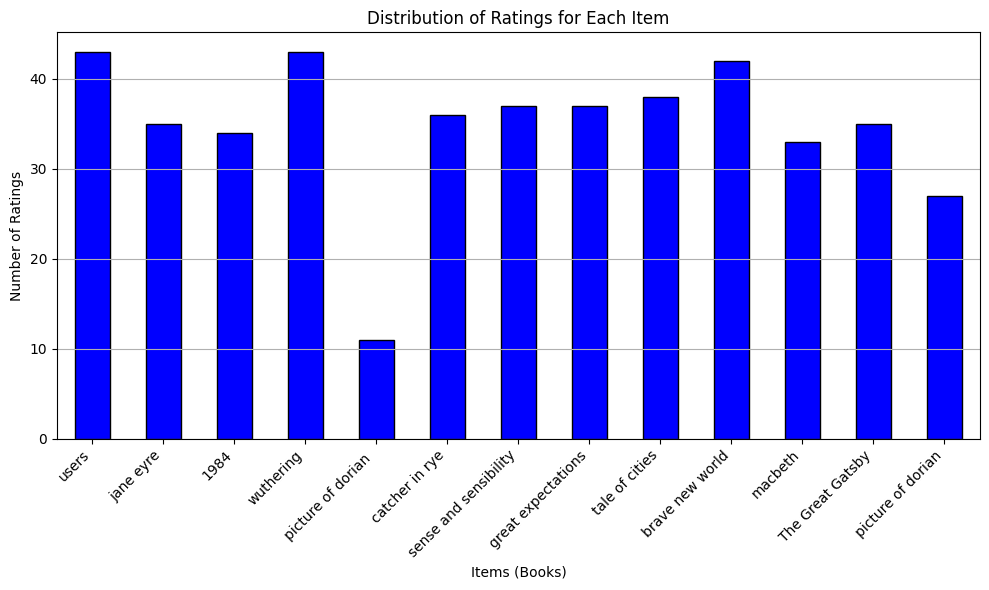

In [105]:
item_ratings_count = df.count(axis=0)
plt.figure(figsize=(10, 6))
item_ratings_count.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Items (Books)')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings for Each Item')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
total_items = df.shape[1]
threshold = int(0.5 * total_items)
print(f"Threshold for co-rated items: {threshold} items")

active_users = [3, 6, 41]


max_users_per_active_user = []

if len(df) > 41:
    for active_user in active_users:
        count_users_meeting_threshold = 0

        for other_user in range(df.shape[0]):
            if active_user != other_user:

                co_rated_items = df.loc[active_user].notna() & df.loc[other_user].notna()
                no_coRated_items = co_rated_items.sum()

                if no_coRated_items >= threshold:
                    count_users_meeting_threshold += 1

        max_users_per_active_user.append(count_users_meeting_threshold)

final_max_users = max(max_users_per_active_user)


print(f"Maximum number of users meeting the threshold for any active user: {final_max_users}")
print(f"Users meeting threshold per active user: {max_users_per_active_user}")

Threshold for co-rated items: 6 items
Maximum number of users meeting the threshold for any active user: 42
Users meeting threshold per active user: [42, 35, 39]


# Case 1.1

In [37]:

from sklearn.metrics.pairwise import cosine_similarity

filled_items = items.fillna(0)
cosine_sim = cosine_similarity(filled_items)
cosine_sim_df = pd.DataFrame(cosine_sim, index=items.index, columns=items.index)

def compute_discounted_similarity(sim_matrix, threshold):
    # Discount similarity above the threshold
    return np.where(sim_matrix > threshold, sim_matrix / (1 + threshold), 0)


discount_factor = 8
discounted_cosine_sim_df = pd.DataFrame(compute_discounted_similarity(cosine_sim_df, discount_factor), index=cosine_sim_df.index, columns=cosine_sim_df.columns)

# Function to get the top k similar users based on similarity matrix
def get_top_k_users(similarity_matrix, k_percent):
    k = int(similarity_matrix.shape[0] * k_percent)
    top_users = {}
    for user in similarity_matrix.index:
        similar_users = similarity_matrix.loc[user].sort_values(ascending=False).iloc[1:k+1]  # Exclude self (0 similarity)
        top_users[user] = similar_users.index.tolist()
    return top_users

top_20_percent_users = get_top_k_users(cosine_sim_df, 0.2)

top_20_percent_users_ds = get_top_k_users(discounted_cosine_sim_df, 0.2)

def predict_ratings(active_user, top_users, df):
    active_user_ratings = df.loc[active_user]
    predictions = {}
    for item in df.columns:
        if pd.isna(active_user_ratings[item]):  # Predict only missing ratings
            similar_users = top_users[active_user]
            ratings = df.loc[similar_users, item].dropna()
            if len(ratings) > 0:
                predictions[item] = ratings.mean()
    return predictions

U1_index = U1.name
U2_index = U2.index[0]
U3_index = U3.index[0]

users_to_predict = [U1_index, U2_index,U3_index]

for user in users_to_predict:
    print(f"Top 20% closest users for {user} (Original Cosine Similarity): {top_20_percent_users[user]}")
    predictions = predict_ratings(user, top_20_percent_users, df)
    print(f"Predictions for {user} (Original Cosine Similarity): {predictions}")

    print(f"Top 20% closest users for {user} (Discounted Cosine Similarity): {top_20_percent_users_ds[user]}")
    predictions_ds = predict_ratings(user, top_20_percent_users_ds, df)
    print(f"Predictions for {user} (Discounted Cosine Similarity): {predictions_ds}")

    print("-" * 50)


Top 20% closest users for 4 (Original Cosine Similarity): [25, 8, 11, 24, 26, 16, 36, 23]
Predictions for 4 (Original Cosine Similarity): {'1984': 2.8, 'picture of dorian': 1.75}
Top 20% closest users for 4 (Discounted Cosine Similarity): [32, 24, 25, 26, 27, 28, 29, 30]
Predictions for 4 (Discounted Cosine Similarity): {'1984': 3.2857142857142856, 'picture of dorian': 2.4285714285714284}
--------------------------------------------------
Top 20% closest users for 2 (Original Cosine Similarity): [14, 32, 12, 34, 20, 18, 24, 23]
Predictions for 2 (Original Cosine Similarity): {'jane eyre': 1.8333333333333333, 'picture of dorian ': 5.0, 'tale of cities': 0.6, 'picture of dorian': 3.2}
Top 20% closest users for 2 (Discounted Cosine Similarity): [32, 24, 25, 26, 27, 28, 29, 30]
Predictions for 2 (Discounted Cosine Similarity): {'jane eyre': 2.5714285714285716, 'tale of cities': 1.8571428571428572, 'picture of dorian': 2.4285714285714284}
--------------------------------------------------
T

# Case 1.2


In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


mean_centered_df = items.sub(items.mean(axis=1), axis=0)
filled_centered_df = mean_centered_df.fillna(0)

cosine_sim_centered = cosine_similarity(filled_centered_df)
cosine_sim_centered_df = pd.DataFrame(cosine_sim_centered, index=items.index, columns=items.index)


def get_top_k_users(similarity_matrix, k_percent):
    k = int(similarity_matrix.shape[0] * k_percent)
    top_users = {}
    for user in similarity_matrix.index:
        similar_users = similarity_matrix.loc[user].sort_values(ascending=False).iloc[1:k+1]  # Exclude self
        top_users[user] = similar_users.index.tolist()
    return top_users

top_20_percent_users_centered = get_top_k_users(cosine_sim_centered_df, 0.2)


def predict_ratings(active_user, top_users, df):
    active_user_ratings = df.loc[active_user]
    predictions = {}
    for item in df.columns:
        if pd.isna(active_user_ratings[item]):
            similar_users = top_users[active_user]
            ratings = df.loc[similar_users, item].dropna()
            if len(ratings) > 0:
                predictions[item] = ratings.mean()
    return predictions


users_to_predict = items.index[:3]

print("Predictions using mean-centered cosine similarity:")
print("-" * 50)
for user in users_to_predict:
    predictions_centered = predict_ratings(user, top_20_percent_users_centered, items)
    print(f"Top 20% closest users for {user}: {top_20_percent_users_centered[user]}")
    print(f"Predictions with mean-centering for {user}: {predictions_centered}")
    print("-" * 50)

def compute_discounted_similarity(sim_matrix, threshold, discount_factor, apply_discount=True):

    discounted_sim = np.copy(sim_matrix)
    if apply_discount:
        discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)  # Apply discount to high similarity values
    return discounted_sim

threshold = 0.3
discount_factor = 0.5
apply_discount = True

discounted_sim = compute_discounted_similarity(cosine_sim_centered_df, threshold, discount_factor, apply_discount)
discounted_sim_df = pd.DataFrame(discounted_sim, index=cosine_sim_centered_df.index, columns=cosine_sim_centered_df.index)

top_20_percent_users_ds = get_top_k_users(discounted_sim_df, 0.2)

print("Predictions using discounted similarity:")
print("-" * 50)
for user in users_to_predict:
    predictions_ds = predict_ratings(user, top_20_percent_users_ds, items)
    print(f"Top 20% closest users for {user} (Discounted Similarity): {top_20_percent_users_ds[user]}")
    print(f"Predictions for {user} using Discounted Similarity: {predictions_ds}")
    print("-" * 50)


Predictions using mean-centered cosine similarity:
--------------------------------------------------
Top 20% closest users for 0: [7, 21, 39, 37, 41, 25, 30, 9]
Predictions with mean-centering for 0: {'jane eyre': 3.5714285714285716, 'picture of dorian': 1.0}
--------------------------------------------------
Top 20% closest users for 1: [27, 9, 23, 20, 38, 15, 29, 6]
Predictions with mean-centering for 1: {'macbeth': 2.2857142857142856, 'The Great Gatsby': 2.3333333333333335, 'picture of dorian': 2.6}
--------------------------------------------------
Top 20% closest users for 2: [15, 41, 30, 14, 32, 12, 10, 18]
Predictions with mean-centering for 2: {'jane eyre': 2.1666666666666665, 'picture of dorian ': 2.5, 'tale of cities': 1.6666666666666667, 'picture of dorian': 2.6666666666666665}
--------------------------------------------------
Predictions using discounted similarity:
--------------------------------------------------
Top 20% closest users for 0 (Discounted Similarity): [7,

# Case 1.3

In [40]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

file_path = '/content/expanded_dataset_with_names.xlsx'
df = pd.read_excel(file_path).set_index('users')


data_matrix = df.to_numpy()


def calculate_pcc(matrix):
    n_users = matrix.shape[0]
    pcc_matrix = np.zeros((n_users, n_users))

    for i in range(n_users):
        for j in range(i + 1, n_users):

            common = ~np.isnan(matrix[i]) & ~np.isnan(matrix[j])

            if np.sum(common) > 1:
                pcc, _ = pearsonr(matrix[i, common], matrix[j, common])
                pcc_matrix[i, j] = pcc
                pcc_matrix[j, i] = pcc
            else:
                pcc_matrix[i, j] = 0
                pcc_matrix[j, i] = 0

    return pcc_matrix


pcc_matrix = calculate_pcc(data_matrix)


def get_top_users(pcc_matrix, top_percent=0.2):
    n_users = pcc_matrix.shape[0]
    top_users = {}

    for i in range(n_users):

        similarities = [(j, pcc_matrix[i, j]) for j in range(n_users) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)

        top_users[i] = [user[0] for user in similarities[:top_k]]

    return top_users

top_20_users = get_top_users(pcc_matrix)


def predict_ratings(matrix, pcc_matrix, top_users):
    predictions = np.copy(matrix)
    n_items = matrix.shape[1]

    for user in range(len(top_users)):
        for item in range(n_items):
            if np.isnan(matrix[user, item]):
                neighbors = [neighbor for neighbor in top_users[user] if not np.isnan(matrix[neighbor, item])]

                if neighbors:

                    num = sum(pcc_matrix[user, neighbor] * matrix[neighbor, item] for neighbor in neighbors)
                    denom = sum(abs(pcc_matrix[user, neighbor]) for neighbor in neighbors)

                    if denom > 0:
                        predictions[user, item] = num / denom

    return predictions

predicted_ratings = predict_ratings(data_matrix, pcc_matrix, top_20_users)


def compute_discounted_similarity(pcc_matrix, threshold):
    return np.where(np.abs(pcc_matrix) > threshold, pcc_matrix / (1 + np.abs(pcc_matrix)), 0)

discount_factor = 0.5
discounted_similarity = compute_discounted_similarity(pcc_matrix, discount_factor)


top_20_users_ds = get_top_users(discounted_similarity)

predicted_ratings_ds = predict_ratings(data_matrix, discounted_similarity, top_20_users_ds)

for user in [2,5,41]:
    print(f"Top 20% nearest users for User {df.index[user]} (Original PCC):")
    nearest_users = top_20_users[user]
    for neighbor in nearest_users:
        print(f"  User {df.index[neighbor]} with PCC: {pcc_matrix[user, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for User {df.index[user]} (Original PCC):")
    for item_idx, item_name in enumerate(df.columns):
        if np.isnan(data_matrix[user, item_idx]):
            print(f"  {item_name}: {predicted_ratings[user, item_idx]:.2f}")

    print(f"\nTop 20% nearest users for User {df.index[user]} (Discounted Similarity):")
    nearest_users_ds = top_20_users_ds[user]
    for neighbor in nearest_users_ds:
        print(f"  User {df.index[neighbor]} with Discounted Similarity: {discounted_similarity[user, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for User {df.index[user]} (Discounted Similarity):")
    for item_idx, item_name in enumerate(df.columns):
        if np.isnan(data_matrix[user, item_idx]):
            print(f"  {item_name}: {predicted_ratings_ds[user, item_idx]:.2f}")
    print("\n---\n")


<ipython-input-40-747dc2a5de18>:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(matrix[i, common], matrix[j, common])


Top 20% nearest users for User Matthew (Original PCC):
  User Christine Lawson with PCC: 0.89
  User John Clark with PCC: 0.87
  User Stephen with PCC: 0.76
  User Luis Barber with PCC: 0.67
  User Mario the lone bookwolf with PCC: 0.66
  User Michael Eaton with PCC: 0.62
  User Anne with PCC: 0.52
  User Tiffany Duke with PCC: 0.48

Predicted ratings for missing values for User Matthew (Original PCC):
  jane eyre: 2.27
  picture of dorian : 2.32
  tale of cities: 2.13
  picture of dorian: 2.12

Top 20% nearest users for User Matthew (Discounted Similarity):
  User Christine Lawson with Discounted Similarity: 0.47
  User John Clark with Discounted Similarity: 0.47
  User Stephen with Discounted Similarity: 0.43
  User Luis Barber with Discounted Similarity: 0.40
  User Mario the lone bookwolf with Discounted Similarity: 0.40
  User Michael Eaton with Discounted Similarity: 0.38
  User Anne with Discounted Similarity: 0.34
  User Sean Barrs with Discounted Similarity: 0.00

Predicted ra

# Case 2.1

In [83]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = '/content/expanded_dataset_with_names.xlsx'
df = pd.read_excel(file_path).set_index('users')

data_matrix = df.to_numpy()

def calculate_cosine_similarity(matrix):
    item_matrix = np.nan_to_num(matrix.T)
    cosine_sim = cosine_similarity(item_matrix)
    return cosine_sim

cosine_sim_matrix = calculate_cosine_similarity(data_matrix)

def get_top_items(sim_matrix, top_percent=0.25):
    n_items = sim_matrix.shape[0]
    top_items = {}

    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]

    return top_items

top_25_items = get_top_items(cosine_sim_matrix, top_percent=0.25)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape

    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):  # Predict only missing values
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]

                if neighbors:
                    # Weighted average of neighbors' ratings
                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)

                    if denom > 0:
                        predictions[user, item] = num / denom

    return predictions


predicted_item_ratings = predict_item_ratings(data_matrix, cosine_sim_matrix, top_25_items)

def compute_discounted_similarity(sim_matrix, threshold, discount_factor):

    discounted_sim = np.copy(sim_matrix)
    discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim


discount_factor = 2
threshold = 0.6
discounted_similarity_matrix = compute_discounted_similarity(cosine_sim_matrix, threshold, discount_factor)

top_20_items_ds = get_top_items(discounted_similarity_matrix, top_percent=0.2)

predicted_item_ratings_ds = predict_item_ratings(data_matrix, discounted_similarity_matrix, top_20_items_ds)

item_indices = [1, 6]

for item in item_indices:
    print(f"Top 25% closest items for Item {df.columns[item]} (Cosine Similarity):")
    nearest_items = top_25_items[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Cosine Similarity: {cosine_sim_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Cosine Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings[user_idx, item]:.2f}")
    print("\n---\n")

for item in item_indices:
    print(f"Top 20% closest items for Item {df.columns[item]} (Discounted Similarity):")
    nearest_items = top_20_items_ds[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Discounted Similarity: {discounted_similarity_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Discounted Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings_ds[user_idx, item]:.2f}")
    print("\n---\n")


Top 25% closest items for Item 1984 (Cosine Similarity):
  Item great expectations with Cosine Similarity: 0.72
  Item brave new world with Cosine Similarity: 0.71

Predicted ratings for missing values for Item 1984 (Cosine Similarity):
  User Emily May: 1.99
  User Anne: 4.00
  User Stephen: 2.51
  User Logan Hoffman: 3.49
  User Molly Garcia: 2.00
  User Dawn Jones: 4.00
  User David Terry: 0.50
  User Brandy Ward: 0.50
  User Amanda Leach: 2.99

---

Top 25% closest items for Item great expectations (Cosine Similarity):
  Item catcher in rye with Cosine Similarity: 0.73
  Item 1984 with Cosine Similarity: 0.72

Predicted ratings for missing values for Item great expectations (Cosine Similarity):
  User Anne: nan
  User Luís: 4.51
  User John Clark: 4.00
  User Molly Garcia: 0.00
  User Dawn Jones: 3.00
  User Jasmine Williams: 1.48

---

Top 20% closest items for Item 1984 (Discounted Similarity):
  Item tale of cities with Discounted Similarity: 0.59
  Item jane eyre with Discounte

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

file_path = '/content/expanded_dataset_with_names.xlsx'
df = pd.read_excel(file_path).set_index('users')

data_matrix = df.to_numpy()

def calculate_cosine_similarity(matrix):
    item_matrix = np.nan_to_num(matrix.T)
    cosine_sim = cosine_similarity(item_matrix)
    return cosine_sim

cosine_sim_matrix = calculate_cosine_similarity(data_matrix)

def get_top_items(sim_matrix, top_percent=0.25):
    n_items = sim_matrix.shape[0]
    top_items = {}

    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]

    return top_items

top_25_items = get_top_items(cosine_sim_matrix, top_percent=0.25)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape

    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]

                if neighbors:
                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)

                    if denom > 0:
                        predictions[user, item] = num / denom

    return predictions

predicted_item_ratings = predict_item_ratings(data_matrix, cosine_sim_matrix, top_25_items)

def compute_discounted_similarity(sim_matrix, threshold):

    discounted_sim = np.where(sim_matrix <= threshold, sim_matrix, 0)
    return discounted_sim

discount_factor =0.5
discounted_similarity_matrix = compute_discounted_similarity(cosine_sim_matrix, discount_factor)

top_20_items_ds = get_top_items(discounted_similarity_matrix, top_percent=0.2)

predicted_item_ratings_ds = predict_item_ratings(data_matrix, discounted_similarity_matrix, top_20_items_ds)

item_indices = [1, 6]
for item in item_indices:
    print(f"Top 25% closest items for Item {df.columns[item]} (Original Cosine Similarity):")
    nearest_items = top_25_items[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Cosine Similarity: {cosine_sim_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Original Cosine Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings[user_idx, item]:.2f}")
    print("\n---\n")

for item in item_indices:
    print(f"Top 20% closest items for Item {df.columns[item]} (Discounted Similarity):")
    nearest_items = top_20_items_ds[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Discounted Similarity: {discounted_similarity_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Discounted Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings_ds[user_idx, item]:.2f}")
    print("\n---\n")


Top 25% closest items for Item 1984 (Original Cosine Similarity):
  Item great expectations with Cosine Similarity: 0.72
  Item brave new world with Cosine Similarity: 0.71

Predicted ratings for missing values for Item 1984 (Original Cosine Similarity):
  User Emily May: 1.99
  User Anne: 4.00
  User Stephen: 2.51
  User Logan Hoffman: 3.49
  User Molly Garcia: 2.00
  User Dawn Jones: 4.00
  User David Terry: 0.50
  User Brandy Ward: 0.50
  User Amanda Leach: 2.99

---

Top 25% closest items for Item great expectations (Original Cosine Similarity):
  Item catcher in rye with Cosine Similarity: 0.73
  Item 1984 with Cosine Similarity: 0.72

Predicted ratings for missing values for Item great expectations (Original Cosine Similarity):
  User Anne: nan
  User Luís: 4.51
  User John Clark: 4.00
  User Molly Garcia: 0.00
  User Dawn Jones: 3.00
  User Jasmine Williams: 1.48

---

Top 20% closest items for Item 1984 (Discounted Similarity):
  Item jane eyre with Discounted Similarity: 0.49


# Case 2.2

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = '/content/expanded_dataset_with_names.xlsx'
df = pd.read_excel(file_path).set_index('users')

data_matrix = df.to_numpy()


def calculate_mean_centered_cosine_similarity(matrix):
    item_matrix = matrix.T
    mean_centered_matrix = np.zeros_like(item_matrix)
    for i in range(item_matrix.shape[0]):
        item = item_matrix[i]
        mean = np.nanmean(item)
        mean_centered_matrix[i] = np.where(np.isnan(item), 0, item - mean)
    cosine_sim = cosine_similarity(mean_centered_matrix)
    return cosine_sim

mean_centered_cosine_sim_matrix = calculate_mean_centered_cosine_similarity(data_matrix)


def get_top_items(sim_matrix, top_percent=0.2):
    n_items = sim_matrix.shape[0]
    top_items = {}
    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]
    return top_items

top_20_items = get_top_items(mean_centered_cosine_sim_matrix, top_percent=0.2)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape
    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):  # Predict only missing values
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]
                if neighbors:
                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)
                    if denom > 0:
                        predictions[user, item] = num / denom
    return predictions

predicted_item_ratings = predict_item_ratings(data_matrix, mean_centered_cosine_sim_matrix, top_20_items)

def compute_discounted_similarity(sim_matrix, threshold, discount_factor):
    discounted_sim = np.copy(sim_matrix)
    discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim

threshold = 0.1
discount_factor = 0.2

discounted_similarity_matrix = compute_discounted_similarity(mean_centered_cosine_sim_matrix, threshold, discount_factor)


top_20_items_ds = get_top_items(discounted_similarity_matrix, top_percent=0.2)

predicted_item_ratings_ds = predict_item_ratings(data_matrix, discounted_similarity_matrix, top_20_items_ds)

item_indices = [1, 6]

for item in item_indices:
    print(f"Top 20% closest items for Item {df.columns[item]}:")

    nearest_items = top_20_items[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Mean-Centered Cosine Similarity: {mean_centered_cosine_sim_matrix[item, neighbor]:.2f}")
        print(f"  Item {df.columns[neighbor]} with Discounted Similarity: {discounted_similarity_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]}:")

    print("  Predictions using Mean-Centered Cosine Similarity:")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"    User {user_name}: {predicted_item_ratings[user_idx, item]:.2f}")

    print("\n  Predictions using Discounted Similarity:")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"    User {user_name}: {predicted_item_ratings_ds[user_idx, item]:.2f}")

    print("\n---\n")


Top 20% closest items for Item 1984:
  Item great expectations with Mean-Centered Cosine Similarity: 0.15
  Item great expectations with Discounted Similarity: 0.13
  Item macbeth with Mean-Centered Cosine Similarity: 0.11
  Item macbeth with Discounted Similarity: 0.09

Predicted ratings for missing values for Item 1984:
  Predictions using Mean-Centered Cosine Similarity:
    User Emily May: 2.05
    User Anne: nan
    User Stephen: 5.00
    User Logan Hoffman: 2.00
    User Molly Garcia: nan
    User Dawn Jones: 5.00
    User David Terry: 1.82
    User Brandy Ward: 2.64
    User Amanda Leach: 0.59

  Predictions using Discounted Similarity:
    User Emily May: 2.05
    User Anne: nan
    User Stephen: 5.00
    User Logan Hoffman: 2.00
    User Molly Garcia: nan
    User Dawn Jones: 5.00
    User David Terry: 1.82
    User Brandy Ward: 2.64
    User Amanda Leach: 0.59

---

Top 20% closest items for Item great expectations:
  Item catcher in rye with Mean-Centered Cosine Similarity: 

# case 2.3

In [88]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

file_path = '/content/dataset assignment 2.xlsx'
df = pd.read_excel(file_path).set_index('users')
data_matrix = df.to_numpy()

def calculate_pearson_correlation(matrix):
    item_matrix = matrix.T
    n_items = item_matrix.shape[0]
    pcc_matrix = np.zeros((n_items, n_items))
    for i in range(n_items):
        for j in range(n_items):
            if i != j:
                valid_indices = ~np.isnan(item_matrix[i]) & ~np.isnan(item_matrix[j])
                if np.any(valid_indices):
                    pcc_matrix[i, j], _ = pearsonr(item_matrix[i, valid_indices], item_matrix[j, valid_indices])
                else:
                    pcc_matrix[i, j] = 0
    return pcc_matrix

pcc_matrix = calculate_pearson_correlation(data_matrix)

def get_top_items(sim_matrix, top_percent=0.2):
    n_items = sim_matrix.shape[0]
    top_items = {}
    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]
    return top_items

top_20_items_pcc = get_top_items(pcc_matrix, top_percent=0.2)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape
    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]
                if neighbors:
                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)
                    if denom > 0:
                        predictions[user, item] = num / denom
    return predictions

predicted_item_ratings_pcc = predict_item_ratings(data_matrix, pcc_matrix, top_20_items_pcc)

def compute_discounted_similarity(sim_matrix, threshold, discount_factor):
    discounted_sim = np.copy(sim_matrix)
    discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim

threshold = 0.1
discount_factor = 0.5
discounted_similarity_matrix_pcc = compute_discounted_similarity(pcc_matrix, threshold, discount_factor)

top_20_items_ds_pcc = get_top_items(discounted_similarity_matrix_pcc, top_percent=0.2)
predicted_item_ratings_ds_pcc = predict_item_ratings(data_matrix, discounted_similarity_matrix_pcc, top_20_items_ds_pcc)

item_indices = [0, 1]

for item in item_indices:
    print(f"Top 20% closest items for Item {df.columns[item]} (PCC and Discounted Similarity):")
    nearest_items = top_20_items_pcc[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Pearson Correlation: {pcc_matrix[item, neighbor]:.2f}")
        print(f"  Item {df.columns[neighbor]} with Discounted Similarity: {discounted_similarity_matrix_pcc[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]}:")

    print("  Predictions using Pearson Correlation:")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"    User {user_name}: {predicted_item_ratings_pcc[user_idx, item]:.2f}")

    print("\n  Predictions using Discounted Similarity:")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_matrix[user_idx, item]):
            print(f"    User {user_name}: {predicted_item_ratings_ds_pcc[user_idx, item]:.2f}")

    print("\n---\n")


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset assignment 2.xlsx'